<br> 


# Dimensionality Reduction in Python

<br><br>


##  Exploring high dimensional data 


###  `t-SNE`

<br>

In [ ]:
location = 'datasets/'

import os, random, time, fsspec, gunzip, datetime, requests, copy, inspect, collections, itertools

import pandas as pd, pandas_datareader as pd_dr, re
import numpy as np, seaborn as sns
from numpy import savetxt
from numpy import genfromtxt
import sklearn, sklearn_pandas
from sklearn import *
import missingno as msno
import h5py, pickle, urllib

import scipy, scipy.stats as stats, random, math
from sklearn.pipeline import Pipeline
from math import sqrt
import joblib, re

import matplotlib, graphviz
import matplotlib.pyplot as plt
from matplotlib import *
%config Completer.use_jedi = False
%matplotlib inline
plt.style.use('dark_background')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost; import xgboost as xgb

import hyperopt
import hyperopt as hopt

np.random.seed(1)

In [115]:
ansur_df = pd.read_csv( location+'ansure.csv', index_col= [0] )
ansur_df.head(3)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal


In [120]:
# drop non-numeric column

ansur_numr_df = ansur_df.select_dtypes(include=np.number)

ansur_numr_df.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103


In [121]:
ansurNorm_df = pd.DataFrame( data= sklearn.preprocessing.StandardScaler().fit_transform( ansur_numr_df ),
                             columns= ansur_numr_df.columns  )
ansurNorm_df.head(3)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,0.522269,0.769286,0.464593,-0.180144,0.658062,0.522889,0.536089,0.059396,0.676015,-0.038243,0.053298,-0.234394,-0.345106,-0.752010,0.311519,-0.537643,-0.061175,0.216128,0.295969,0.409300,-0.425562,0.682066,0.394086,0.515590,0.271199,0.502490,0.947870,-0.327640,-0.010551,0.268578,1.717459,-1.028651,0.213584,0.384248,0.320643,0.573125,0.440280,0.132767,0.367591,0.332738,0.495341,0.795249,0.651994,0.322770,-0.350072,0.708857,1.139128,-0.294891,-0.127597,-0.647756,-0.609106,0.516863,1.435326,0.231345,0.224012,0.800894,0.581137,0.570912,1.020651,-0.465903,-0.192758,0.617569,0.580955,0.682597,-0.128449,0.665719,0.698206,0.233112,0.615861,-0.005850,0.659941,0.283986,0.603837,0.164272,0.584688,-0.125333,-0.211249,-0.760614,-0.068667,1.100769,1.559060,0.666565,0.706686,1.103624,0.309405,0.161891,0.289972,1.992598,0.358849,0.456971,0.481462,0.114405,0.684317,-0.282504
1,-0.360154,-0.141132,-0.066339,-0.304750,-0.091768,0.047932,-0.129825,-0.172128,-0.070677,-0.922763,-0.278991,-0.982876,1.118073,0.642727,-0.646355,-0.995660,-0.363281,-0.002778,-0.739838,-1.000604,-0.947676,-0.076977,-0.670893,-0.010916,0.047115,-0.100697,0.472929,-0.151154,0.824385,-0.659868,-0.128368,-1.343865,-0.312601,-0.117396,-0.129985,-0.001933,0.397256,-0.200042,-0.466238,0.299441,-0.088259,0.164929,-0.055395,0.496610,-0.991594,-0.111280,0.549830,0.061315,0.209550,-1.438403,-0.917774,0.099237,-0.345204,0.672565,0.379231,0.438049,-0.003653,0.162154,0.470403,-1.067849,1.457146,0.114639,0.161593,-0.097906,0.572225,0.026003,-0.262557,-0.111636,-0.047952,-0.327826,-0.311462,0.023204,-0.337206,-0.169592,-0.202498,-0.389639,-0.869304,-0.452333,0.600240,0.596684,-1.444329,0.648183,-0.033559,-0.777773,-0.048130,-0.389458,-0.131255,-0.189903,0.358849,-0.152625,-0.316077,-0.454230,-0.137833,-0.476555
2,1.083811,0.301433,0.657659,0.318283,0.380347,0.700998,0.092147,0.919343,1.615402,-0.714641,1.263777,0.514088,1.176600,1.123671,-0.646355,0.443822,0.618562,0.562729,0.414347,0.306136,0.847091,0.278824,0.248861,0.972559,0.569978,0.452224,0.527730,0.312124,0.256629,1.506507,-0.333460,0.232202,-0.137206,0.575351,0.621062,0.400608,0.698424,2.063061,0.367591,0.798902,0.188951,1.267988,1.037842,1.191969,-0.670833,0.162099,0.667690,1.040881,-0.127597,0.024294,0.224298,0.216172,0.887471,1.160230,1.103587,0.619471,0.464179,-0.042225,0.332842,0.075848,0.4418

In [122]:
# tsne

tsne_fit_2D = sklearn.manifold.TSNE( n_components= 2, init= 'pca', n_jobs= os.cpu_count()-1, n_iter_without_progress = 300 )\
                                .fit_transform( ansur_numr_df )

tsne_fitT_2D = sklearn.manifold.TSNE( n_components= 2, init= 'pca', n_jobs= os.cpu_count()-1, n_iter_without_progress = 300 )\
                                .fit_transform(  ansurNorm_df )

ansur_df['x'], ansur_df['y'] = tsne_fit_2D[:,0], tsne_fit_2D[:,1]
ansur_df['x_norm'], ansur_df['y_norm'] = tsne_fitT_2D[:,0], tsne_fitT_2D[:,1]

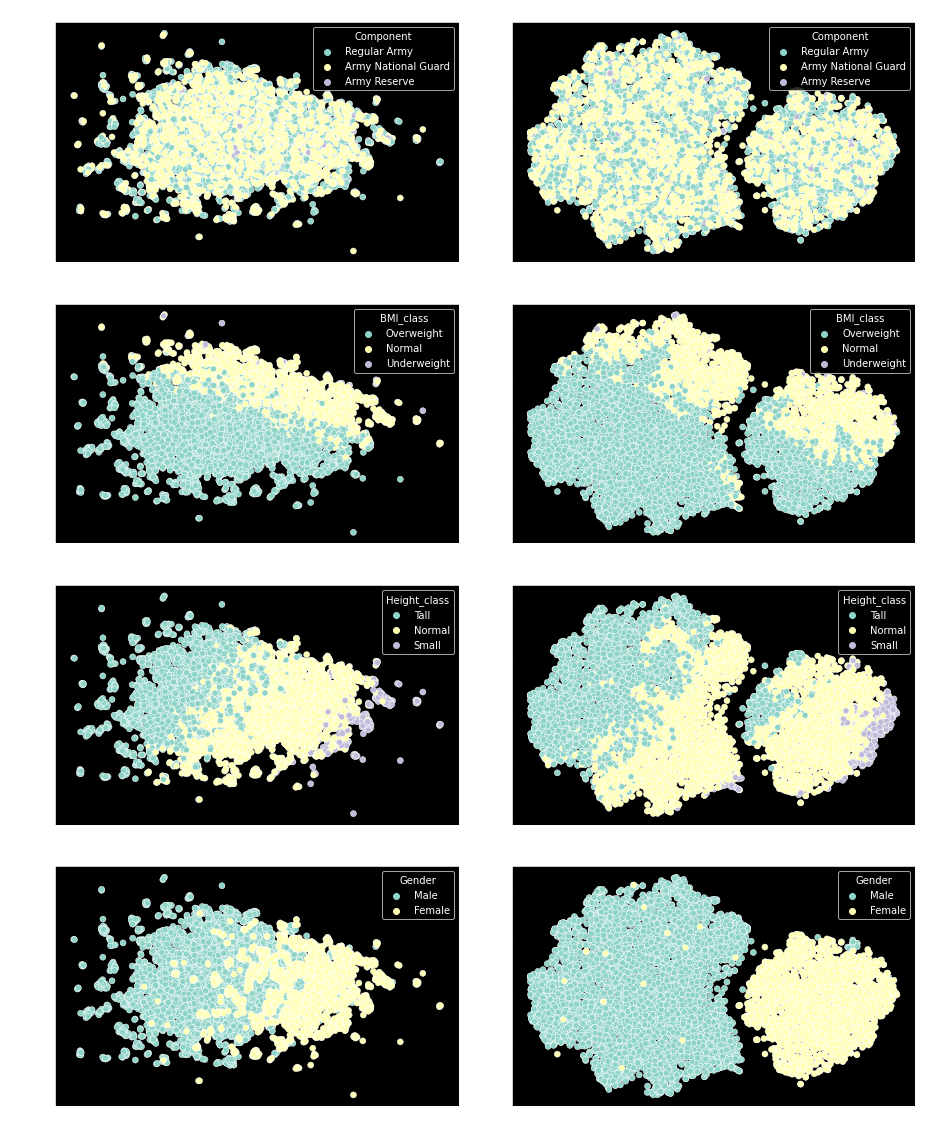

In [133]:
fg,ax = plt.subplots( 4,2, figsize= (13,4*4) )

sns.scatterplot( x= 'x', y= 'y', data= ansur_df, hue= 'Component', ax= ax[0][0] )
sns.scatterplot( x= 'x_norm', y= 'y_norm', data= ansur_df, hue= 'Component', ax= ax[0][1]  )

sns.scatterplot( x= 'x', y= 'y', data= ansur_df, hue= 'BMI_class', ax= ax[1][0] )
sns.scatterplot( x= 'x_norm', y= 'y_norm', data= ansur_df, hue= 'BMI_class', ax= ax[1][1]  )

sns.scatterplot( x= 'x', y= 'y', data= ansur_df, hue= 'Height_class', ax= ax[2][0] )
sns.scatterplot( x= 'x_norm', y= 'y_norm', data= ansur_df, hue= 'Height_class', ax= ax[2][1]  )

sns.scatterplot( x= 'x', y= 'y', data= ansur_df, hue= 'Gender', ax= ax[3][0] )
sns.scatterplot( x= 'x_norm', y= 'y_norm', data= ansur_df, hue= 'Gender', ax= ax[3][1]  )

ax[0][0].set( title= 't-SNE' ); ax[0][1].set( title= 't-SNE for Normalized features' );

plt.tight_layout(); plt.show()

<br>

## Feature selection using Model 

### Feature selection based on Variance threshold
<br>

In [3]:
ansur_df = pd.read_csv( location+'ansure.csv', index_col= [0] )
ansur_df.head(2)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal


In [4]:
# data preprocessing

numr_feature_ls = ansur_df.select_dtypes( include= np.number ).columns.tolist()

ansur_df = ansur_df[numr_feature_ls]

ansur_df.head(3)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480


In [10]:
# standarization is important as different features have different variance and thus a single variance threshold for all features doesn't make sense

ansurNorm_df = ansur_df/ansur_df.mean()

print(  ansurNorm_df.var(), '\n\n', min(ansurNorm_df.var()), max(ansurNorm_df.var())  )

abdominalextensiondepthsitting    0.023026
acromialheight                    0.003164
acromionradialelength             0.004006
anklecircumference                0.005095
                                    ...   
wristheight                       0.003295
weight_kg                         0.038563
stature_m                         0.002757
BMI                               0.022027
Length: 94, dtype: float64 

 0.0010296225338952572 0.038562570335054634


In [6]:
varThreshold_obj  = sklearn.feature_selection.VarianceThreshold( threshold= 0.015 )

varThreshold_obj.fit( ansurNorm_df )

VarianceThreshold(threshold=0.015)

In [7]:
varThreshold_obj.get_support()[:27]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [632]:
len(varThreshold_obj.get_support())

94

In [8]:
ansurReduced_df = ansur_df.loc[ :, varThreshold_obj.get_support() ]

print(  'Dimensionality reduced from {} to {}'.format( ansur_df.shape[1], ansurReduced_df.shape[1] )  )

ansurReduced_df.head(3)

Dimensionality reduced from 94 to 6


,abdominalextensiondepthsitting,earprotrusion,waistcircumference,waistdepth,weight_kg,BMI
0,266,19,933,240,81.5,25.838761
1,233,18,870,225,72.6,25.062103
2,287,23,964,255,92.9,30.861480


<br>

### Feature selection based on high correlation 

We're going to remove highly correlated features in the numeric ANSUR dataset. We'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95. 

In [11]:
ansurNorm_df.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,1.079245,1.043266,1.029402,0.987143,1.036466,1.036067,1.037203,1.004498,1.082320,0.997325,1.004576,0.982663,0.981851,0.949008,1.016293,0.959724,0.993295,1.013616,1.016422,1.023944,0.966218,1.038924,1.028781,1.050779,1.028846,1.031938,1.062888,0.976117,0.999101,1.024702,1.133716,0.853421,1.025273,1.020467,1.021591,1.037890,1.030208,1.013523,1.041523,1.021398,1.030807,1.059405,1.049733,1.019618,0.985657,1.022744,1.049228,0.980089,0.989303,0.952967,0.948842,1.029749,1.082829,1.024178,1.020029,1.055702,1.036797,1.034683,1.106633,0.961917,0.987292,1.065413,1.053561,1.042204,0.991954,1.050009,1.053272,1.019159,1.039303,0.999499,1.033284,1.018848,1.040042,1.010322,1.032824,0.993100,0.980394,0.930041,0.995320,1.071480,1.080097,1.041077,1.042747,1.087889,1.035405,1.020228,1.044959,1.167097,1.021812,1.035485,1.027637,1.022464,1.035927,0.958076
1,0.945353,0.992063,0.995802,0.978250,0.994915,1.003306,0.990991,0.986964,0.991394,0.935447,0.976048,0.927302,1.058799,1.043582,0.966194,0.925413,0.960186,0.999825,0.958950,0.941465,0.924772,0.995607,0.951004,0.998925,1.005011,0.993600,1.031378,0.988982,1.070262,0.939310,0.990006,0.808504,0.963010,0.993747,0.991247,0.999872,1.027256,0.979625,0.947333,1.019256,0.994511,1.012320,0.995775,1.030184,0.959373,0.996430,1.023761,1.004140,1.017568,0.895560,0.922917,1.005712,0.980079,1.070290,1.033907,1.030466,0.999769,1.009851,1.049146,0.912714,1.096062,1.012143,1.014898,0.993947,1.035845,1.001953,0.979967,0.990825,0.996940,0.971927,0.984292,1.001540,0.977639,0.989344,0.988632,0.978549,0.919320,0.958396,1.040907,1.038747,0.925797,1.039944,0.997970,0.938060,0.994493,0.951338,0.979649,0.984075,1.021812,0.988148,0.981857,0.910809,0.992764,0.929278


In [36]:
corr_threshold = 0.95

corr_mtrx_df = ansur_df.corr().abs()

# mask for upper triangular mtrx

mask_np = np.triu(  m= np.ones_like( corr_mtrx_df, dtype= bool )  );
print( f' mask_np -->\n\n{mask_np}\n\n' )
corr_TriuMask_df = corr_mtrx_df.mask( cond= mask_np )                                     # <-- masked df

# sns.heatmap( corr_TriuMask_df, center= 0, linewidths= 1, annot= True, fmt= '.2f' )

 mask_np -->

[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ... False  True  True]
 [False False False ... False False  True]]




In [37]:
# List column names of highly correlated features (r > 0.95)
      
toBeDropped_Col = [ e_col for e_col in corr_TriuMask_df if any( corr_TriuMask_df[e_col] > corr_threshold )  ]

print( f'Column to be dropped --> {toBeDropped_Col[:5]}\n\n' )
print( 'The reduced dataframe has columns = {}  vs. original cols = {} if corr = {} is considered.'
                                      .format( len(toBeDropped_Col), ansur_df.shape[0], corr_threshold )  )



Column to be dropped --> ['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength']


The reduced dataframe has columns = 19  vs. original cols = 6068 if corr = 0.95 is considered.


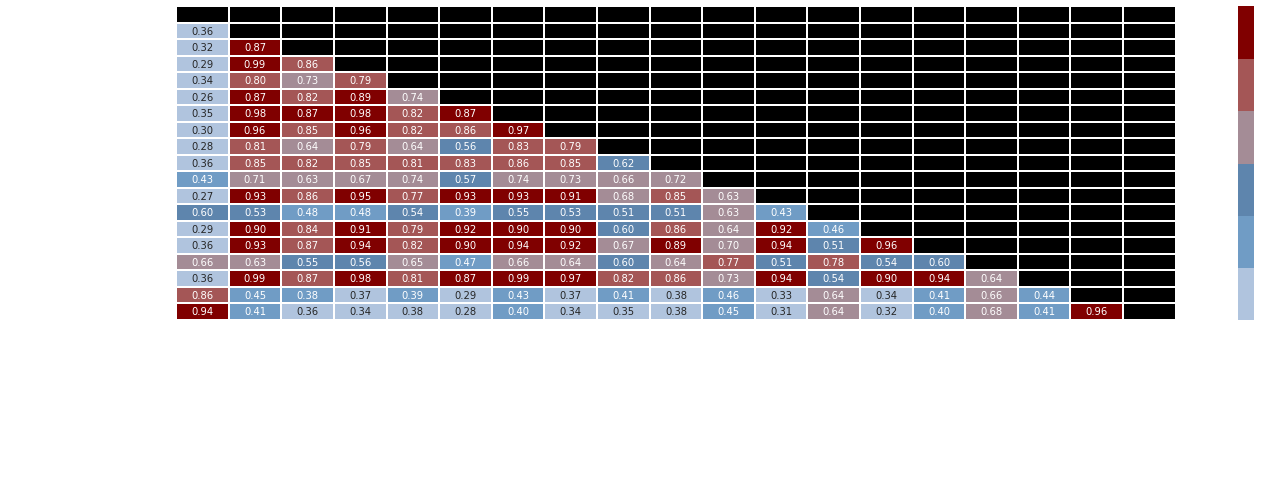

In [61]:
# mask for upper triangular mtrx

corr_mtrx_df = ansur_df[toBeDropped_Col].corr().abs()

maskTrui_np = np.triu(  m= np.ones_like( corr_mtrx_df, dtype= bool )  );                      
# print( f' mask_np -->\n\n{mask_np}\n\n' )
corr_TriuMask_df = corr_mtrx_df.mask( cond= maskTrui_np )                                     # <-- masked df

fig, ax = plt.subplots( figsize= (20,7) )

palette_custom =  "sns.color_palette( palette= 'blend:lightsteelblue,steelblue,rosybrown,maroon', n_colors= 6 )" 
sns.heatmap( corr_TriuMask_df,  cmap= eval(palette_custom),
             linewidths= 1, annot= True, fmt= '.2f', ax= ax );
plt.tight_layout(); plt.show()

<br>

### `Recursive Feature Elimination`

<h3>Recursive Feature Elimination working mechanism</h3>
<p>
    
Be aware that dropping one weak feature can make other features relatively more or less important. If one want to play safe and minimize the risk of dropping the wrong features, one should not drop all least important features at once but rather one by one. To do so we need to use `Recursive Feature Eliminator RFE()`, around the model.

<br>

In [609]:
ansur_df = pd.read_csv( location+'ansure.csv', index_col= [0] )
ansur_df.head(2)

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal


In [610]:
# data preprocessing

nom_feature_ls  = ansur_df.drop(columns='Gender').select_dtypes(exclude=np.number).columns
numr_feature_ls = ansur_df.select_dtypes( include= np.number ).columns

OHEncoder = sklearn.preprocessing.OneHotEncoder( sparse= False, drop= 'first', dtype= np.int8 )

OHEncoder_np = OHEncoder.fit_transform( ansur_df[nom_feature_ls] )

OHEncoder_df = pd.DataFrame( OHEncoder_np, index= ansur_df.index, columns= OHEncoder.get_feature_names(nom_feature_ls) )

stdScale_df =  pd.DataFrame( sklearn.preprocessing.StandardScaler().fit_transform( ansur_df[numr_feature_ls] ),
                             index= ansur_df.index, columns= numr_feature_ls )

ansur_df = ansur_df.drop( columns= nom_feature_ls ).merge( OHEncoder_df, left_index= True, right_index= True )

ansur_df.head(3)

,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,Branch_Combat Service Support,Branch_Combat Support,Component_Army Reserve,Component_Regular Army,BMI_class_Overweight,BMI_class_Underweight,Height_class_Small,Height_class_Tall
0,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,0,0,0,1,1,0,0,1
1,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,0,1,0,1,1,0,0,0
2,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,0,1,0,1,1,0,0,0


In [611]:
xtrn, xtst, ytrn, ytst = sklearn.model_selection.train_test_split( ansur_df.drop(columns='Gender'), ansur_df.Gender, test_size= 30./100, random_state= 10 )
xtrn.shape

(4247, 102)

In [225]:
# logistic classifier

logis_est = sklearn.linear_model.LogisticRegression( max_iter= 1000 ).fit( xtrn,ytrn )

yhat = logis_est.predict( xtst )

print(   'Accuracy on test set --> {0:.1%}'.format( sklearn.metrics.accuracy_score(ytst,yhat) )   ) 

Accuracy on test set --> 100.0%


                coeff   val
91          weight_kg  0.15
24         chestdepth  0.14
61  neckcircumference  0.14
45  headcircumference  0.11


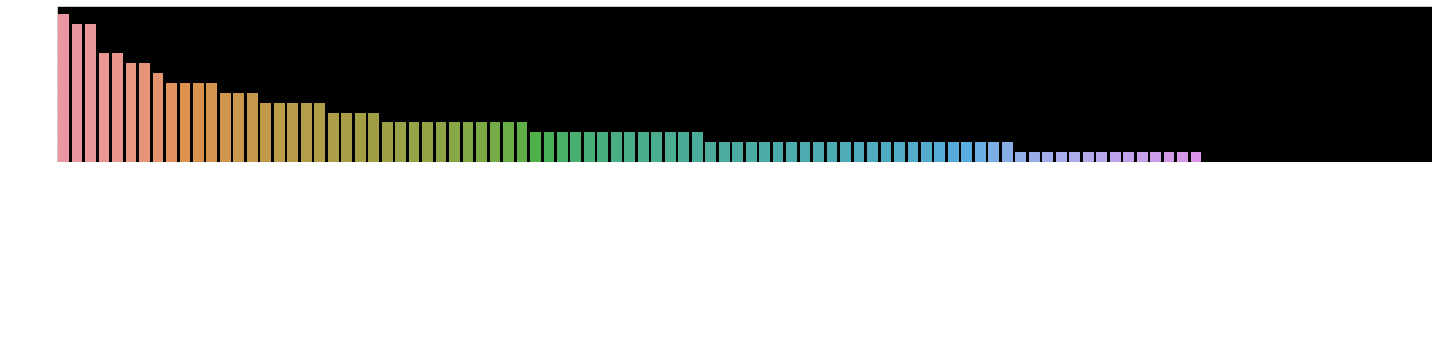

In [224]:
# feature coeff

coeff_val = abs(logis_est.coef_[0].round(2))
coeff_df = pd.DataFrame.from_dict(  data= dict( zip(xtrn.columns,coeff_val) ),  orient= 'index'  ).reset_index()

coeff_df.columns = [ 'coeff', 'val' ]

coeff_df = coeff_df.sort_values( by= 'val', ascending= False )

print( coeff_df.head(4) )

fg,ax = plt.subplots( figsize= (20,5) )

sns.barplot( x= 'coeff', y= 'val', data= coeff_df, ax= ax )

ax.set_xticklabels( labels=  coeff_df['coeff'], rotation= 90 )
plt.tight_layout()

### `Recursive Feature Elimination`


<div class= 'span5 alert alert-danger'>
<h3>Recursive Feature Elimination working mechanism</h3>

<p>
    
Be aware that dropping one weak feature can make other features relatively more or less important. If one want to play safe and minimize the risk of dropping the wrong features, one should not drop all least important features at once but rather one by one. To do so we need to use `Recursive Feature Eliminator RFE()`, around the model.
</div>

In [612]:
rfe_est = sklearn.feature_selection.RFECV( estimator= sklearn.linear_model.LogisticRegression(max_iter=1000), cv=6, min_features_to_select= 14, step= 5,
                                           n_jobs= os.cpu_count()-1, verbose= 2  )

rfe_est.fit( xtrn, ytrn )

Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 37 features.
Fitting estimator with 32 features.
Fitting estimator with 27 features.


RFECV(cv=6, estimator=LogisticRegression(max_iter=1000),
      min_features_to_select=14, n_jobs=11, step=5, verbose=2)

In [261]:
coeffRSE_df = pd.DataFrame.from_dict( dict( zip(xtrn.columns,rfe_est.ranking_) ), orient= 'index').reset_index( )
coeffRSE_df.columns = [ 'coeff', 'val' ]

coeffRSE_df = coeffRSE_df.sort_values( by= 'val', ascending= True )
print( coeffRSE_df[:20], xtrn.columns[rfe_est.support_] )

                     coeff  val
50       hipbreadthsitting    1
79            tibialheight    1
75          tenthribheight    1
71  sleevelengthspinewrist    1
..                     ...  ...
91               weight_kg    1
9         bicristalbreadth    1
12        bitragionchinarc    1
55    kneeheightmidpatella    2

[20 rows x 2 columns] Index(['bicepscircumferenceflexed', 'bicristalbreadth', 'bitragionchinarc',
       'buttockcircumference', 'cervicaleheight', 'chestdepth', 'chestheight',
       'headcircumference', 'heelanklecircumference', 'hipbreadthsitting',
       'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'neckcircumference', 'radialestylionlength', 'sleevelengthspinewrist',
       'tenthribheight', 'tibialheight', 'waistbreadth', 'weight_kg'],
      dtype='object')


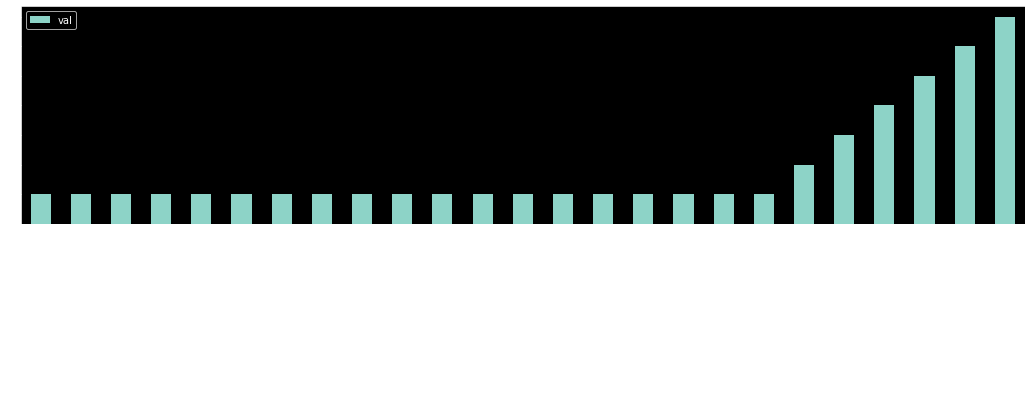

In [283]:
coeffRSE_df[:25].plot( x= 'coeff', y= 'val', kind= 'bar', figsize= (18,4)  );

In [285]:
# model metrics

acc_score = sklearn.metrics.accuracy_score( ytst, rfe_est.predict(xtst) )
acc_score

0.99945085118067

<br>

### Tree-based feature selection

<br>

In [293]:
liver_df  = pd.read_csv( location+'indian_liver_patient_preprocessed.csv', index_col= 0 )

xtrn,xtst, ytrn,ytst = sklearn.model_selection.train_test_split( liver_df.drop('Liver_disease',axis=1), liver_df.Liver_disease,
                                                                 test_size= 30./100 )
print( list(ytrn[:10]), '\n', xtrn.shape ); xtrn.head(3)

[1, 1, 1, 1, 1, 0, 0, 0, 1, 1] 
 (405, 10)


,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std
295,-1.405646,-0.436391,-0.459878,-0.367231,-0.017080,-0.239691,1.401035,0.959354,-0.147390,1
561,1.309101,2.134991,2.169769,0.097118,0.829801,0.944703,0.385998,-1.434352,-1.713237,1
343,1.555897,-0.034613,0.037623,-0.383668,-0.224702,-0.284581,-0.813592,-1.434352,-1.400067,1


In [306]:
# base logistic regression

logis_est = sklearn.linear_model.LogisticRegressionCV( cv= 5 ).fit( xtrn,ytrn )

logis_est.scores_[1].mean()

0.7143209876543212

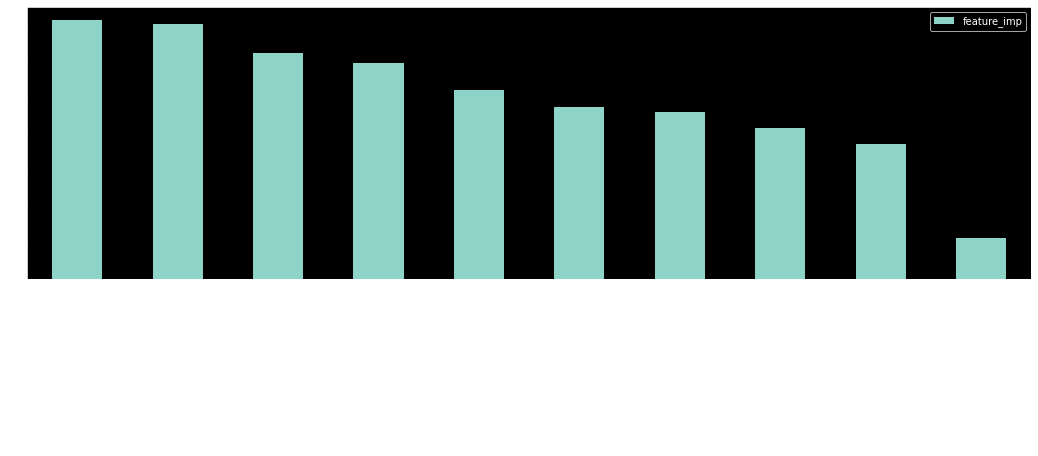

In [327]:
rndForest_est = sklearn.ensemble.RandomForestClassifier( n_estimators= 150 ).fit( xtrn,ytrn )

rndForest_est.feature_importances_

featureImp_df = pd.DataFrame.from_dict(  dict( zip(xtrn.columns,rndForest_est.feature_importances_) ), orient= 'index', columns= ['feature_imp']  )

featureImp_df.sort_values(by='feature_imp',ascending=False).mul(100)\
                                                .plot( kind= 'bar', figsize= (18,5) ); 
plt.show()



<div class= 'span5 alert alert-danger'>
<h3>Recursive Feature Elimination working mechanism: using RFE() with RandomForest</h3>
<p>
    
Remember dropping one weak feature can make other features relatively more or less important. If one want to play safe and minimize the risk of dropping the wrong features, one should not drop all least important features at once but rather one by one. To do so one can wrap a Recursive Feature Eliminator, or RFE(), around the model.
</div>

In [381]:
rfe_est = sklearn.feature_selection.RFECV(  estimator= sklearn.ensemble.RandomForestClassifier(n_estimators=50), 
                                            min_features_to_select= 6, step=1, cv= 7, n_jobs= os.cpu_count()-1, verbose= 3  )\
                                       .fit( xtrn,ytrn )
rfe_est.support_

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


array([ True,  True, False,  True,  True,  True, False,  True, False,
       False])

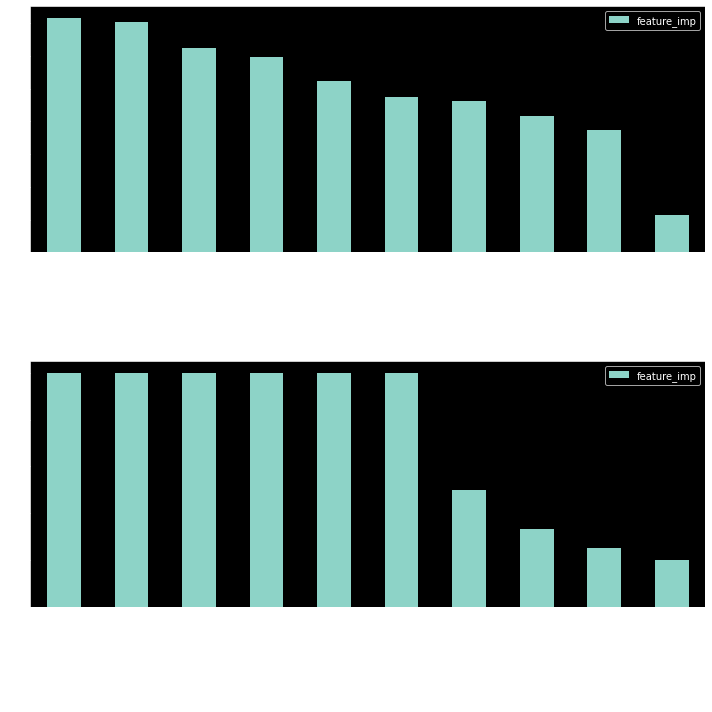

In [400]:
featureImpRFE_df = pd.DataFrame.from_dict(  dict( zip(xtrn.columns,1/rfe_est.ranking_) ), orient= 'index', columns= ['feature_imp'] )   # <-- inverse of ranking

# plots
fg,ax = plt.subplots( 2,1, figsize= (10,10) )

featureImp_df.sort_values(by='feature_imp',ascending=False).mul(100).plot( kind= 'bar', ax= ax[0] ); 

featureImpRFE_df.sort_values(by='feature_imp',ascending=False).plot( kind= 'bar', ax= ax[1] );

ax[0].set_xticklabels( labels= featureImp_df.index, rotation= 30 ); ax[1].set_xticklabels( labels= featureImp_df.index, rotation= 30 )
plt.tight_layout(); plt.show()

In [404]:
# metric
print( 'Model test accuracy --> ',
       sklearn.metrics.accuracy_score( ytst, rfe_est.predict(xtst) )
     )

Model test accuracy -->  0.7183908045977011


<br>

### Combining multiple models for feature selection

<br>

In [8]:
ansur_df = pd.read_csv( location+'ansure.csv', index_col= [0] )

# data preprocessing

nom_feature_ls  = ansur_df.drop(columns=['BMI_class','BMI']).select_dtypes(exclude=np.number).columns
numr_feature_ls = ansur_df.select_dtypes( include= np.number ).columns

OHEncoder = sklearn.preprocessing.OneHotEncoder( sparse= False, drop= 'first', dtype= np.int8 )

OHEncoder_np = OHEncoder.fit_transform( ansur_df[nom_feature_ls] )

OHEncoder_df = pd.DataFrame( OHEncoder_np, index= ansur_df.index, columns= OHEncoder.get_feature_names(nom_feature_ls) )

stdScale_df =  pd.DataFrame( sklearn.preprocessing.StandardScaler().fit_transform( ansur_df[numr_feature_ls] ),
                             index= ansur_df.index, columns= numr_feature_ls )

ansur_df = ansur_df.drop( columns= nom_feature_ls ).merge( OHEncoder_df, left_index= True, right_index= True )

ansur_df.head(3)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Branch_Combat Service Support,Branch_Combat Support,Component_Army Reserve,Component_Regular Army,Gender_Male,Height_class_Small,Height_class_Tall
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,0,0,0,1,1,0,1
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,0,1,0,1,1,0,0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,0,1,0,1,1,0,0


In [10]:
# train/test

xtrn, xtst, ytrn, ytst = sklearn.model_selection.train_test_split(
                              pd.DataFrame( sklearn.preprocessing.StandardScaler().fit_transform( ansur_df.drop(columns=['BMI','BMI_class']) ),
                                            columns= ansur_df.drop(columns=['BMI','BMI_class']).columns ),
                              ansur_df['BMI'],
                              test_size= 28/100, random_state= 200  )

print( f'{xtrn.shape}, {ytrn.shape}, \n\n{ytrn.head(3)}'  )
xtrn.head(2)

(4368, 100), (4368,), 

3743    35.884641
1249    26.143566
633     26.985229
Name: BMI, dtype: float64


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,Branch_Combat Service Support,Branch_Combat Support,Component_Army Reserve,Component_Regular Army,Gender_Male,Height_class_Small,Height_class_Tall
3743,1.966234,1.667060,1.140324,2.125079,1.213492,2.125869,2.163880,0.952418,1.615402,1.938921,2.545462,2.198172,0.649856,1.748898,1.406231,1.817874,1.751458,0.836362,0.680698,0.237360,2.282904,1.358088,3.056532,2.442804,2.474695,1.721428,1.020937,1.790199,0.022847,2.125472,0.486907,-0.083011,1.792138,1.100883,2.423577,1.838254,1.472857,1.896656,2.003178,1.731231,1.429100,1.267988,1.487999,1.713489,1.414112,1.091587,1.256987,2.243075,1.052416,1.447458,0.995969,0.734029,1.572290,1.137008,0.508580,1.828954,1.955394,1.729061,2.258707,2.212756,-0.192758,2.654435,2.205981,0.670948,1.833440,1.113520,1.153304,1.676748,0.837132,-1.213261,1.233952,1.414041,0.682257,1.409494,1.333784,1.229234,1.537793,1.027419,1.306308,1.537643,2.460077,0.262141,2.258158,1.894356,1.822051,2.130996,2.115289,1.581402,0.996836,2.057163,2.055551,2.618953,1.328705,-1.047259,-0.525226,-0.193958,-1.03557,0.697514,-0.207292,1.222729
1249,0.388569,-0.141132,0.078461,-0.491660,-0.077882,0.107302,0.462099,-0.105978,0.290626,-2.223529,0.148237,-0.795756,0.064584,0.161784,0.174680,-0.511471,-0.023412,-0.148715,-0.029570,-0.140907,-0.197137,0.006043,-0.574076,-0.279137,-0.251664,-0.050431,0.107591,-0.724735,-0.544910,1.197025,1.102183,0.232202,-0.698469,-0.380162,0.621062,0.630631,0.483304,0.798386,0.608118,0.366036,-0.394649,0.164929,0.459069,-0.546430,-0.991594,-0.767389,0.314111,0.150366,1.052416,-1.003547,-0.856041,-0.134634,0.613543,-0.024099,0.249882,-0.136455,0.259503,-0.178478,1.708460,0.166140,0.568736,0.215225,0.554744,0.507858,0.151821,0.026003,0.546506,0.383940,0.040557,-0.247332,-0.466004,-0.446203,0.525416,0.480089,-0.075533,-0.224448,-0.349787,-0.082395,0.488755,0.327838,-0.843652,-0.050368,-0.266787,0.149292,-0.790701,-0.091905,0.261890,0.569228,-0.151540,0.075974,-0.525955,-0.236999,-0.104503,-1.047259,1.903943,-0.193958,-1.03557,0.697514,-0.207292,-0.817843


##### 1st model: Linear Regression with `Lasso Regularization`

In [11]:
lasso_est = sklearn.linear_model.LassoCV( cv= 7, max_iter= 2000 ).fit( xtrn,ytrn )
lasso_est.score( xtst,ytst )

0.9938431552531266

In [12]:
lasso_mask = lasso_est.coef_ != 0
len(lasso_est.coef_), sum(lasso_mask)

(100, 59)

##### 2nd model: Random Forest with  `Recursive Feature Elimination (RFE)`

In [76]:
rndForestRFE_est = sklearn.feature_selection.RFECV(  estimator= sklearn.ensemble.RandomForestRegressor( n_jobs= os.cpu_count()-1 ),
                                                     min_features_to_select= sum(lasso_mask), step= 5, cv= 7, n_jobs= os.cpu_count()-1, verbose= 1   )
%time rndForestRFE_est.fit( xtrn,ytrn )

Fitting estimator with 100 features.
Fitting estimator with 95 features.
Fitting estimator with 90 features.
Fitting estimator with 85 features.
Fitting estimator with 80 features.
Fitting estimator with 75 features.
Fitting estimator with 70 features.
Fitting estimator with 65 features.
Fitting estimator with 60 features.
Wall time: 1min 41s


RFECV(cv=7, estimator=RandomForestRegressor(n_jobs=11),
      min_features_to_select=59, n_jobs=11, step=5, verbose=1)

In [77]:
print(  rndForestRFE_est.score(xtst,ytst)  )

rndForestRFE_mask = rndForestRFE_est.support_

rndForestRFE_mask[:9]

0.9655738520021238


array([ True,  True, False,  True,  True, False, False, False,  True])

##### 3rd model: Gradient Boost with  `Recursive Feature Elimination (RFE)`

In [42]:
gradBoostRFE_est = sklearn.feature_selection.RFECV(   estimator= sklearn.ensemble.GradientBoostingRegressor( ),
                                                      min_features_to_select= sum(lasso_mask), step= 5, cv= 5, n_jobs= os.cpu_count()-1, verbose= 1  )
%time gradBoostRFE_est.fit( xtrn,ytrn )

Fitting estimator with 100 features.
Fitting estimator with 95 features.
Fitting estimator with 90 features.
Fitting estimator with 85 features.
Fitting estimator with 80 features.
Fitting estimator with 75 features.
Fitting estimator with 70 features.
Wall time: 1min 8s


RFECV(cv=5, estimator=GradientBoostingRegressor(), min_features_to_select=59,
      n_jobs=11, step=5, verbose=1)

In [78]:
print(  gradBoostRFE_est.score(xtst,ytst)  )

gradBoostRFE_mask = gradBoostRFE_est.support_
gradBoostRFE_mask[:9]

0.9744959461036207


array([ True, False, False,  True,  True,  True, False,  True,  True])

In [50]:
# summing up the votes from 3 models
vote_from_3models = np.sum( [lasso_mask,rndForestRFE_mask,gradBoostRFE_mask], axis= 0 )
vote_from_3models[:20]

array([3, 1, 1, 3, 2, 1, 1, 1, 3, 2, 3, 1, 3, 1, 2, 3, 3, 3, 1, 2])

In [53]:
# choose atleast with 2 votes

vote_atleast2_mask = vote_from_3models >=2
vote_atleast2_mask[:9]

array([ True, False, False,  True,  True, False, False, False,  True])

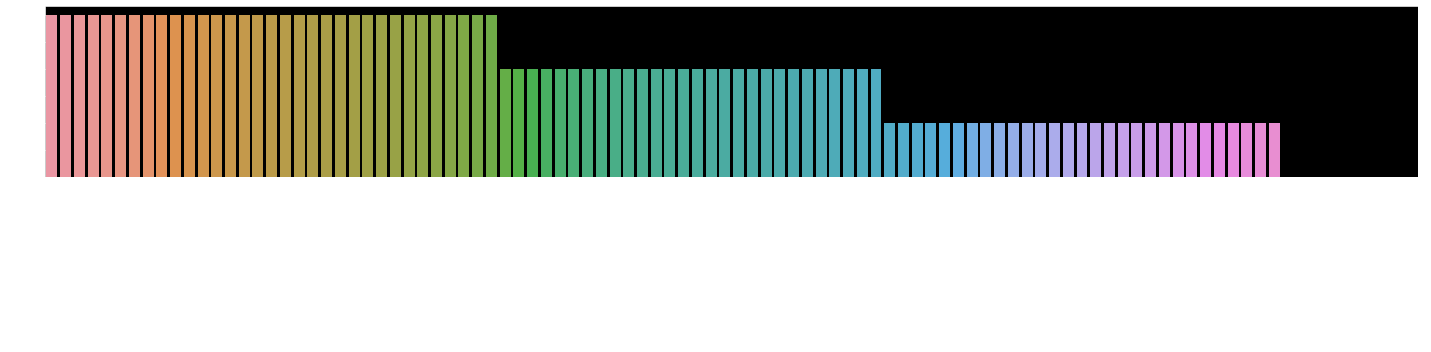

In [75]:
featureImp_df = pd.DataFrame.from_dict( data= dict( zip(xtrn.columns,vote_from_3models) ), orient= 'index', columns= ['feature_imp'] )

fg,ax = plt.subplots( figsize= (20,5) )

sns.barplot( x= featureImp_df.index, y= 'feature_imp', data= featureImp_df.sort_values(by='feature_imp', ascending= False), ax= ax )

ax.set_xticklabels( labels= featureImp_df.index, rotation= 80 )
plt.tight_layout()

#### training model with reduced features

In [85]:
xtrn_reduced = xtrn.loc[ :, vote_atleast2_mask ]
xtst_reduced = xtst.loc[ :, vote_atleast2_mask ]

linReg_est = sklearn.linear_model.LinearRegression().fit( xtrn_reduced, ytrn )

# R2
linReg_est.score(xtst_reduced,ytst), lasso_est.score(xtst,ytst)

(0.9936125372909101, 0.9938431552531266)

##### There is miniscule reduction in the R2 value inspite of reducing features from 100 to `-->`  61

<br>

## Feature extraction


### Principal Component Analysis (PCA)

<br>

In [99]:
ansurm_df = pd.read_csv( 'datasets/ansure-male.csv', usecols= [ 'stature_m','buttockheight','waistcircumference','shouldercircumference' ] )
ansurm_df.head()

,buttockheight,shouldercircumference,waistcircumference,stature_m
0,882,1151,933,1.776
1,870,1119,870,1.702
2,901,1276,964,1.735
3,821,1155,857,1.655
4,1080,1231,868,1.914


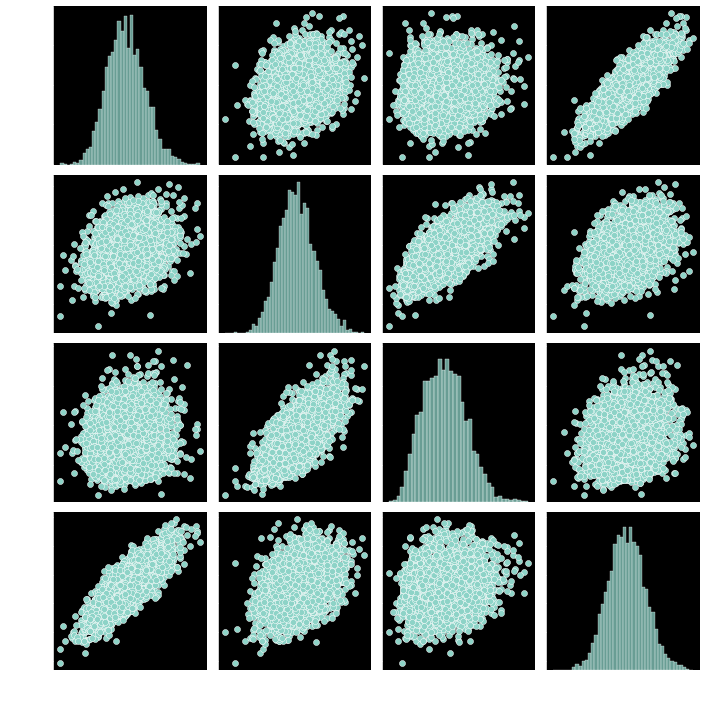

In [101]:
sns.pairplot( ansurm_df );

In [128]:
# standarize data

ansurm_norm_df = pd.DataFrame ( data= sklearn.preprocessing.StandardScaler().fit_transform( ansurm_df ),
                                columns= ansurm_df.columns )

# pca
pca_obj = sklearn.decomposition.PCA()

pca_np  = pca_obj.fit_transform( ansurm_norm_df )

colNm_ls = [ ('pc_'+str(e_colm[0])) for e_colm in enumerate( ansurm_norm_df.columns ) ]

pc_df = pd.DataFrame( pca_fit, columns= colNm_ls )
pc_df.head()

,pc_0,pc_1,pc_2,pc_3
0,0.152320,0.295803,0.280107,-0.317585
1,1.361923,0.297110,0.165502,0.246854
2,-0.837964,-0.807284,-0.973955,0.504025
3,1.998051,-0.660549,-0.485062,0.094875
4,-3.383214,2.919731,-0.444229,1.024835


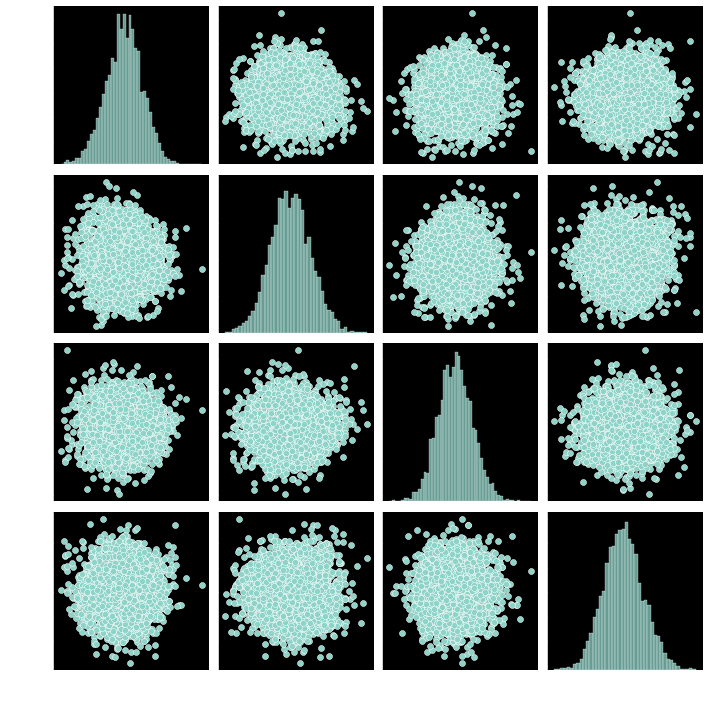

In [130]:
# pc pairplot
sns.pairplot( pc_df );

Notice how, in contrast to the input features, none of the principal components are correlated to one another.

<br>

### PCA on a larger dataset

In [249]:
ansurm_df = pd.read_csv( 'datasets/ansure-male.csv',
                         usecols= [ 'stature_m','buttockheight','waistdepth','span','waistcircumference','shouldercircumference','footlength',
                                    'handlength','functionalleglength','chestheight','chestcircumference','cervicaleheight','sittingheight' ]
                       )
ansurm_df.head()

,buttockheight,cervicaleheight,chestcircumference,chestheight,footlength,functionalleglength,handlength,shouldercircumference,sittingheight,span,waistcircumference,waistdepth,stature_m
0,882,1535,1074,1292,273,1136,193,1151,928,1782,933,240,1.776
1,870,1471,1021,1244,263,1096,195,1119,884,1745,870,225,1.702
2,901,1501,1120,1288,270,1115,203,1276,917,1867,964,255,1.735
3,821,1423,1114,1205,267,1034,194,1155,903,1708,857,205,1.655
4,1080,1684,1048,1452,305,1279,218,1231,919,2035,868,214,1.914


In [163]:
# standarize data

ansurm_norm_df = pd.DataFrame( data= sklearn.preprocessing.StandardScaler().fit_transform( ansurm_df ),
                               columns= ansurm_df.columns )

# pca

pca_obj = sklearn.decomposition.PCA()

pca_np = pca_obj.fit_transform( ansurm_norm_df )

colNm_ls = [  ('pc_'+str(e_colm[0]+1)) for e_colm in enumerate( ansurm_norm_df.columns )  ]

pc_df = pd.DataFrame( pca_np, columns= colNm_ls )

pc_df.head(4)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13
0,-0.106735,-0.128457,-0.410841,-0.014191,0.394098,-0.253546,-0.084907,0.269305,-0.234441,-0.059134,-0.161303,-0.267887,-0.011829
1,2.174431,-0.399665,0.694866,0.068882,0.418598,0.287322,0.109741,0.484254,-0.101049,-0.146606,-0.074437,-0.189415,0.018401
2,-0.804508,1.155240,0.808174,-0.707072,-0.778371,0.803188,0.436320,0.078966,0.312247,-0.036709,0.326122,-0.008462,0.060673
3,3.276417,0.506931,0.523673,-1.615155,-0.192054,-0.087298,0.290449,0.645270,-0.709699,-0.565111,0.118403,-0.073932,0.081627


#### PCA explained variance

In [164]:
print(  'explained_variance_ratio -->\n', pca_obj.explained_variance_ratio_,
        '\n\nexplained_variance_ratio cumu -->\n', np.cumsum( pca_obj.explained_variance_ratio_ )  )

explained_variance_ratio -->
 [0.57832831 0.2230137  0.06404218 0.04252456 0.0278581  0.01761021
 0.01681037 0.01014147 0.00706488 0.00607973 0.00344643 0.00228095
 0.00079911] 

explained_variance_ratio cumu -->
 [0.57832831 0.801342   0.86538419 0.90790875 0.93576684 0.95337706
 0.97018743 0.9803289  0.98739378 0.99347351 0.99691994 0.99920089
 1.        ]


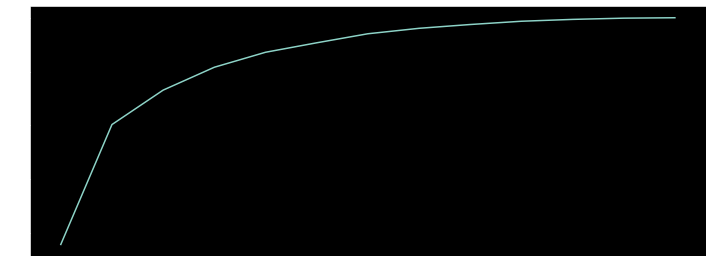

In [165]:
fg,ax = plt.subplots( figsize= (10,4) )

ax.plot(  pca_obj.explained_variance_ratio_.cumsum()  )

plt.tight_layout()

<br>

###  PCA API

### PCA Components

<br>

In [329]:
ansur_df = pd.read_csv( location + 'ansure.csv',
                        usecols= [  'stature_m','buttockheight','waistdepth','span','waistcircumference','shouldercircumference','footlength',
                                     'handlength','functionalleglength','chestheight','chestcircumference','cervicaleheight','sittingheight',
                                     'BMI_class','Height_class','Branch','Component','Gender'  ]
                       )

ansur_cat_df = ansur_df.select_dtypes( exclude= np.number )

ansur_df = ansur_df.select_dtypes( include= np.number )

print( ansur_cat_df.head(3) ); ansur_df.head(3)

           Branch     Component Gender   BMI_class Height_class
0     Combat Arms  Regular Army   Male  Overweight         Tall
1  Combat Support  Regular Army   Male  Overweight       Normal
2  Combat Support  Regular Army   Male  Overweight       Normal


,buttockheight,cervicaleheight,chestcircumference,chestheight,footlength,functionalleglength,handlength,shouldercircumference,sittingheight,span,waistcircumference,waistdepth,stature_m
0,882,1535,1074,1292,273,1136,193,1151,928,1782,933,240,1.776
1,870,1471,1021,1244,263,1096,195,1119,884,1745,870,225,1.702
2,901,1501,1120,1288,270,1115,203,1276,917,1867,964,255,1.735


In [330]:
# standarize data
ansur_norm_df = pd.DataFrame(  data= sklearn.preprocessing.StandardScaler().fit_transform( ansur_df ),  columns= ansur_df.columns  )

# pca
num_component = 13
pca_fit = sklearn.decomposition.PCA( n_components= num_component ).fit( ansur_norm_df )

index_ls = [  ('pc_'+str(e_colm[0]+1)) for e_colm in enumerate( ansur_norm_df.columns )  ]

pca_components_df =  pd.DataFrame(  data= pca_fit.components_,
                                    index= index_ls[:num_component],   # <-- becomes a variable depending upon number of PCA components
                                    columns= ansur_norm_df.columns  )

pca_components_df

,buttockheight,cervicaleheight,chestcircumference,chestheight,footlength,functionalleglength,handlength,shouldercircumference,sittingheight,span,waistcircumference,waistdepth,stature_m
pc_1,-0.280545,-0.318372,-0.233386,-0.310383,-0.298149,-0.303766,-0.273932,-0.281703,-0.264800,-0.307447,-0.191546,-0.181266,-0.315238
pc_2,-0.201581,-0.146226,0.441538,-0.173019,-0.098364,-0.076853,-0.123692,0.221903,-0.099287,-0.142005,0.535137,0.537715,-0.165644
pc_3,0.289866,-0.142708,-0.065582,-0.127575,0.178257,0.130692,0.464341,-0.115702,-0.711150,0.187003,0.022641,0.121530,-0.202961
pc_4,-0.470403,-0.148467,0.137146,-0.144767,0.382916,-0.337240,0.444004,0.372700,0.133721,0.098567,-0.182840,-0.210828,-0.122620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
pc_10,0.403472,-0.174961,-0.216212,-0.690051,0.049223,0.233690,-0.005418,0.278410,0.344896,-0.066880,0.096497,-0.091965,-0.088935
pc_11,0.055032,-0.247035,0.247872,-0.045457,0.014143,0.144964,-0.048561,-0.161711,0.227584,0.148749,-0.674394,0.525571,-0.133274
pc_12,-0.130828,0.601848,0.032496,-0.486137,-0.005538,-0.102408,-0.011644,0.051133,-0.255577,-0.134109,-0.262675,0.200656,0.421242
pc_13,-0.027082,-0.615824,-0.008008,-0.008813,-0.008115,-0.016585,-0.002474,0.032062,-0.123977,-0.025513,0.012897,0.005073,0.776078


#### PCA components in a pipeline

In [331]:
num_component = 2
pline = Pipeline(  steps=  [ ( 'normNm', sklearn.preprocessing.StandardScaler() ),
                             ( 'pcaNm', sklearn.decomposition.PCA(n_components=num_component) ) ]
                )

pline.fit(ansur_df)

pline['pcaNm'].components_

array([[-0.2805445 , -0.31837192, -0.23338569, -0.3103833 , -0.29814879,
        -0.30376605, -0.2739323 , -0.28170283, -0.26480014, -0.30744731,
        -0.1915463 , -0.18126638, -0.31523813],
       [-0.20158077, -0.14622561,  0.44153784, -0.17301926, -0.09836374,
        -0.07685331, -0.12369238,  0.22190255, -0.09928723, -0.14200493,
         0.53513672,  0.53771453, -0.16564405]])

In [332]:
pc_effect_df =  pd.DataFrame(  data= pline['pcaNm'].components_,
                               index= index_ls[:num_component],   # <-- becomes a variable depending upon number of PCA components
                               columns= ansurm_norm_df.columns
                            )
pc_effect_df = pc_effect_df.reset_index()
pc_effect_df

,index,buttockheight,cervicaleheight,chestcircumference,chestheight,footlength,functionalleglength,handlength,shouldercircumference,sittingheight,span,waistcircumference,waistdepth,stature_m
0,pc_1,-0.280545,-0.318372,-0.233386,-0.310383,-0.298149,-0.303766,-0.273932,-0.281703,-0.264800,-0.307447,-0.191546,-0.181266,-0.315238
1,pc_2,-0.201581,-0.146226,0.441538,-0.173019,-0.098364,-0.076853,-0.123692,0.221903,-0.099287,-0.142005,0.535137,0.537715,-0.165644


In [328]:
pd.melt( pc_effect_df, id_vars= 'index' ).head(4)

,index,variable,value
0,pc_1,buttockheight,-0.280545
1,pc_2,buttockheight,-0.201581
2,pc_1,cervicaleheight,-0.318372
3,pc_2,cervicaleheight,-0.146226


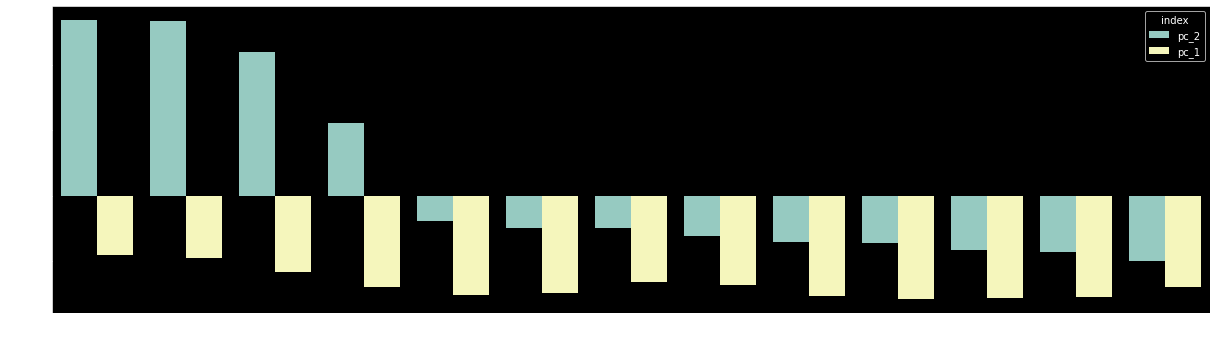

In [333]:
fg,ax = plt.subplots( figsize= (17,5) )

pc_effect_melted_df = pd.melt( pc_effect_df, id_vars= 'index' )

sns.barplot( y= 'value', x= 'variable', data= pc_effect_melted_df.sort_values( ['value','variable'],ascending= False ), hue= 'index',
             ax= ax )

plt.tight_layout()

<br>

### PCA for feature exploration

<br>

In [341]:
num_component = 2
pline = Pipeline(  steps=  [  ( 'normNm', sklearn.preprocessing.StandardScaler() ),
                              ( 'pcaNm', sklearn.decomposition.PCA(n_components=num_component)  ) ]
                )

pca_np =  pline.fit_transform(ansur_df)

pca_np

array([[-1.55406151, -0.04487769],
       [ 0.25834378, -0.25596046],
       [-2.24314852,  0.74884958],
       ...,
       [ 1.61068167,  1.6082294 ],
       [ 4.54074731,  0.20981465],
       [ 3.1710991 ,  0.04698115]])

In [345]:
# Add the 2 PCA components

ansur_cat_df['pc1_component'] = pca_np[ :, 0 ]
ansur_cat_df['pc2_component'] = pca_np[ :, 1 ]

ansur_cat_df

,Branch,Component,Gender,BMI_class,Height_class,pc1_component,pc2_component
0,Combat Arms,Regular Army,Male,Overweight,Tall,-1.554062,-0.044878
1,Combat Support,Regular Army,Male,Overweight,Normal,0.258344,-0.255960
2,Combat Support,Regular Army,Male,Overweight,Normal,-2.243149,0.748850
3,Combat Service Support,Regular Army,Male,Overweight,Normal,1.027385,0.373272
...,...,...,...,...,...,...,...
6064,Combat Support,Army National Guard,Female,Overweight,Normal,2.912387,1.524082
6065,Combat Support,Army National Guard,Female,Overweight,Normal,1.610682,1.608229
6066,Combat Support,Army National Guard,Female,Normal,Normal,4.540747,0.209815
6067,Combat Support,Army National Guard,Female,Normal,Normal,3.171099,0.046981


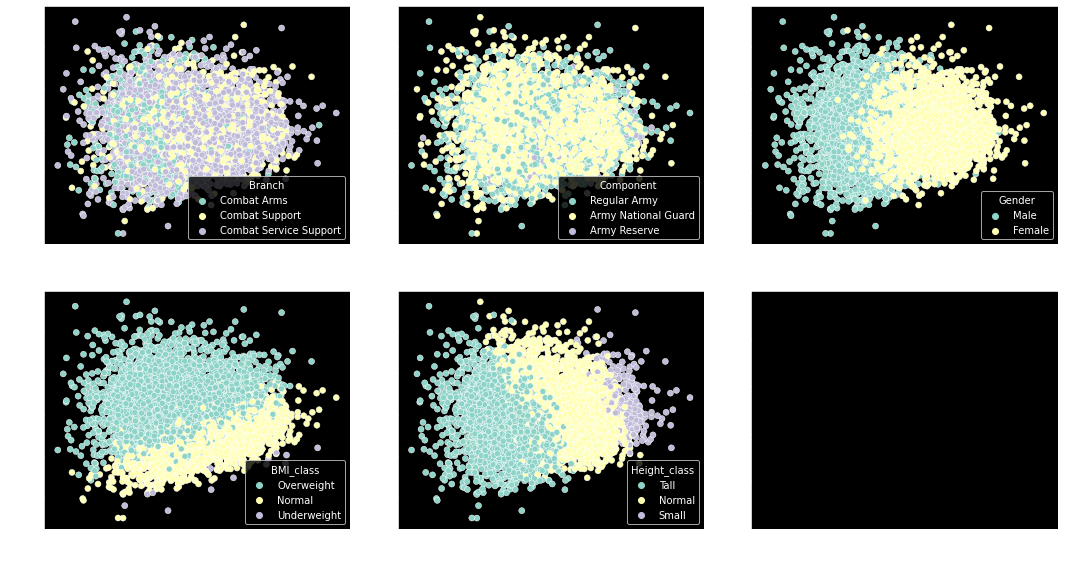

In [354]:
# using  Branch, Component, Gender, BMI_class & Height_class features to color the PC 1 vs PC 2 scatterplot

fg,ax = plt.subplots( 2,3, figsize= (15,4*2) )

cat_ls = ansur_cat_df.select_dtypes( exclude= np.number ).columns

for e_cat, e_ax in zip( cat_ls, ax.flatten() ):
    sns.scatterplot( x= 'pc1_component', y= 'pc2_component', hue= e_cat, data= ansur_cat_df, ax= e_ax )

plt.tight_layout(); plt.show()

<br>

### Model building using Principal Components as exploratory vars

<br>

In [390]:
ansur_df = pd.read_csv( location + 'ansure.csv',
                         usecols= [  'stature_m','buttockheight','waistdepth','span','waistcircumference','shouldercircumference','footlength',
                                     'handlength','functionalleglength','chestheight','chestcircumference','cervicaleheight','sittingheight',
                                     'BMI_class','Height_class','Branch','Component','Gender'  ]
                       )

# train/test

xtrn, xtst, ytrn, ytst = sklearn.model_selection.train_test_split(  ansur_df.select_dtypes(include= np.number),  ansur_df['Gender'],
                                                                    test_size= 25/100, random_state= 10  )

print( f'{xtrn.shape}, {ytrn.shape}, \n\n{ytrn.head(3)}'  );   xtrn.head(2)

(4551, 13), (4551,), 

3883    Male
3073    Male
1161    Male
Name: Gender, dtype: object


,buttockheight,cervicaleheight,chestcircumference,chestheight,footlength,functionalleglength,handlength,shouldercircumference,sittingheight,span,waistcircumference,waistdepth,stature_m
3883,952,1568,1044,1399,277,1119,201,1204,945,1926,850,224,1.839
3073,903,1585,990,1349,283,1159,208,1166,987,1876,830,198,1.850


In [378]:
# pipeline

num_comp = 3

pline_obj = Pipeline(  steps=  [  ( 'normNm', sklearn.preprocessing.StandardScaler() ),
                                  ( 'pcaNm', sklearn.decomposition.PCA( n_components= num_comp )  ),
                                  ( 'classifierNm', sklearn.ensemble.RandomForestClassifier( n_jobs= os.cpu_count()-1 ) )
                               ]
                    )

pline_obj.fit( xtrn,ytrn )

Pipeline(steps=[('normNm', StandardScaler()), ('pcaNm', PCA(n_components=3)),
                ('classifierNm', RandomForestClassifier(n_jobs=11))])

In [379]:
# classifier score

classifier_score = pline_obj.score( xtst, ytst )
classifier_score

0.8859591298615689

In [380]:
# variance

pline_obj.steps[1][1].explained_variance_ratio_,  pline_obj.steps[1][1].explained_variance_ratio_.cumsum()

(array([0.69788183, 0.16377418, 0.04450719]),
 array([0.69788183, 0.86165601, 0.90616319]))

##### for 4 Principal components

In [388]:
# pipeline

num_comp = 4

pline_obj = Pipeline(  steps=  [  ( 'normNm', sklearn.preprocessing.StandardScaler() ),
                                  ( 'pcaNm', sklearn.decomposition.PCA( n_components= num_comp )  ),
                                  ( 'classifierNm', sklearn.ensemble.RandomForestClassifier( n_jobs= os.cpu_count()-1 ) )
                               ]
                    )

pline_obj.fit( xtrn,ytrn )

# classifier score

classifier_score = pline_obj.score( xtst, ytst )

# variance and score

pline_obj.steps[1][1].explained_variance_ratio_,  pline_obj.steps[1][1].explained_variance_ratio_.cumsum(), classifier_score

(array([0.69788183, 0.16377418, 0.04450719, 0.03086169]),
 array([0.69788183, 0.86165601, 0.90616319, 0.93702488]),
 0.9136453526697429)

<br>

### Principal Component selection criteria

<br>

In [400]:
# setting up an explained variable threshold that helps to decide num of components to keep

pline_obj = Pipeline(  steps=  [ ( 'normNm', sklearn.preprocessing.StandardScaler() ),
                                 ( 'pca_Nm', sklearn.decomposition.PCA( n_components= 95/100 ) )
                               ]
                    )

pline_obj.fit(xtrn)

Pipeline(steps=[('normNm', StandardScaler()),
                ('pca_Nm', PCA(n_components=0.95))])

In [402]:
# number of components for explained variable threshold >= 95%

pline_obj['pca_Nm'].components_
# OR
len( pline_obj.steps[1][1].components_ )

5

####  explaned variance ratio vs  nunmber of PC 

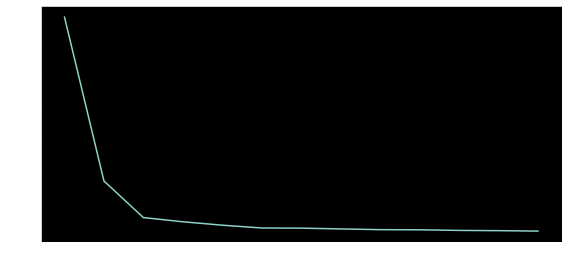

In [411]:
pline_obj = Pipeline(  steps=  [ ( 'normNm', sklearn.preprocessing.StandardScaler() ), ( 'pca_Nm', sklearn.decomposition.PCA() ) ]  )
pline_obj.fit(xtrn)

varRatio_np = pline_obj['pca_Nm'].explained_variance_ratio_

fg,ax = plt.subplots( figsize= (8,4) )
ax.plot( varRatio_np*100 )

ax.set( xlabel= 'Principal Components LABEL', ylabel= 'Explained variance percent' )
plt.tight_layout(); plt.show()

<br>

### Inverse Principal Components
<br>


In [615]:
import keras

(xtrn, ytrn), (xtst,ytst) = keras.datasets.mnist.load_data()

# flattening the row * col and onyl considering 1st 16 images
x = xtrn[:16,:,:].reshape( -1, xtrn.shape[-1]*xtrn.shape[-1]  )

print( x.shape )

(16, 784)


In [616]:
def plot_digits( img_data, figsz= (5,5) ):
    
    '''
    customized func to plot 4 x 4 plots for demo purpose
    input: 
        img_dat --> image with D * row * col dimension, D can be anything, row and column are expected to be same
        figsz   --> the xombined size of the 

    '''
    fg, ax = plt.subplots(  4,4, figsize= figsz, subplot_kw= { 'xticks':[], 'yticks':[] },
                            gridspec_kw= dict( hspace=0.05, wspace=0.05 )
                         )
    row = xtrn.shape[1]
    
    for i, e_ax in enumerate(ax.flat):
        e_ax.imshow( img_data[i].reshape(row,row), cmap= 'gray', clim= (0, 300), vmin= 0, vmax= 16, interpolation= None )
    plt.show()

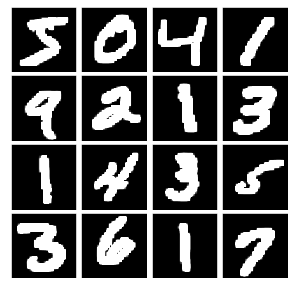

In [617]:
plot_digits( xtrn[:16,:,:] ) 

In [618]:
factor = 10     # factor by which to divide the pixel number to get p components

pline_obj = Pipeline(  steps= [ ( 'normNm', sklearn.preprocessing.StandardScaler() ),
                                ( 'pcaNm',  sklearn.decomposition.PCA( copy= True, n_components= 12, random_state= 10 ) )
                              ]
                    )

pcComp_np = pline_obj.fit_transform( x )

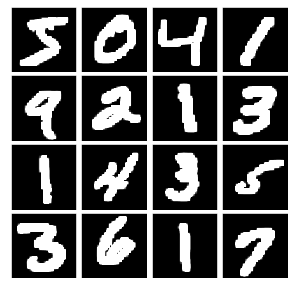

x_rebuilt now has 784 features which is actually made up of only 10 features


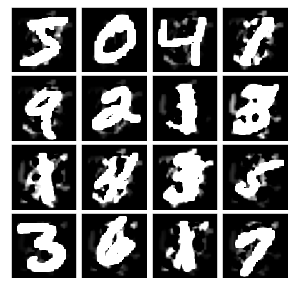

In [620]:
x_rebuilt = pline_obj.inverse_transform( pcComp_np )

# original data



plot_digits( xtrn[:16,:,:] ) 

print( 'x_rebuilt now has {} features which is actually made up of only {} features'.format( x_rebuilt.shape[1],factor ) )

# x rebuilt using only few handful data
plot_digits( x_rebuilt )